<a href="https://colab.research.google.com/github/tejaswiniii-11/House-Prices-Prediction/blob/main/Price_Prediction_for_houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/content/drive/MyDrive/kc_house_data.csv/kc_house_data.csv",parse_dates=['date'])

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

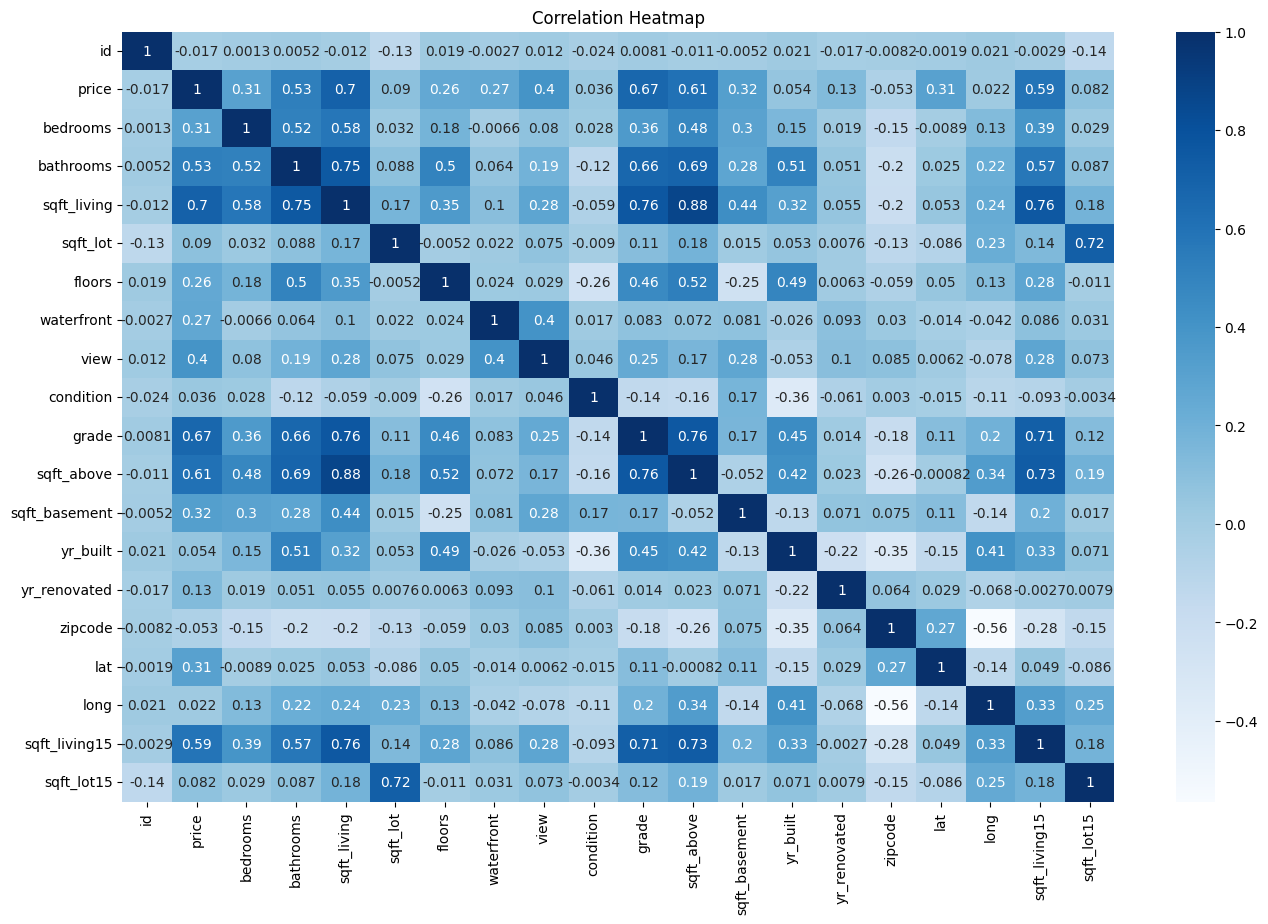

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
data.drop(columns=['id', 'sqft_lot', 'condition', 'zipcode', 'long', 'sqft_lot15'], inplace=True)

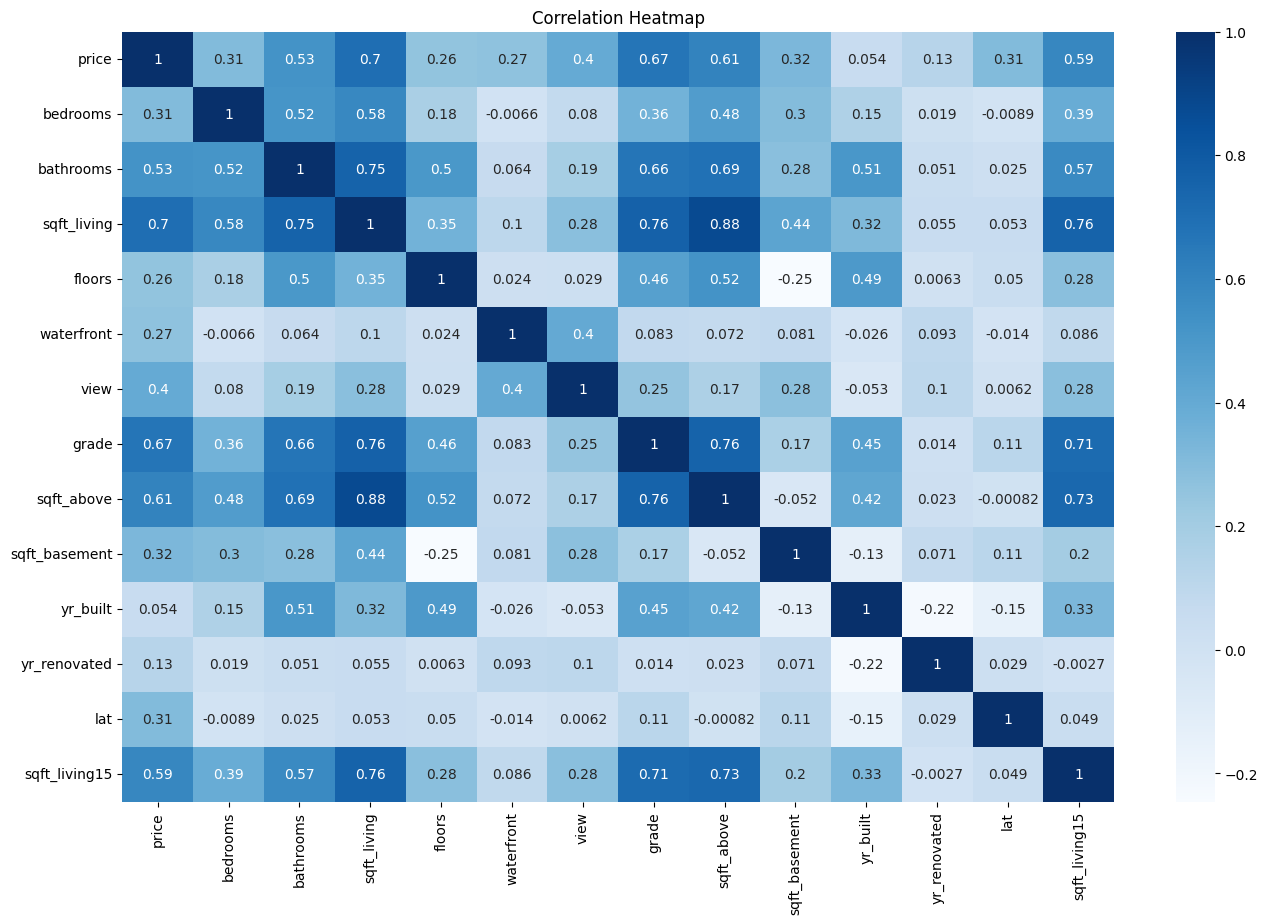

In [11]:
correlation_matrix = data.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [12]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
sqft_living15    0
dtype: int64

In [13]:
for i in data.columns:
    print(i,':',data[i].dtype)

date : datetime64[ns]
price : float64
bedrooms : int64
bathrooms : float64
sqft_living : int64
floors : float64
waterfront : int64
view : int64
grade : int64
sqft_above : int64
sqft_basement : int64
yr_built : int64
yr_renovated : int64
lat : float64
sqft_living15 : int64


In [14]:
data['date']=pd.to_datetime(data.date,format="%Y%m%dT%H%M%S")

In [15]:
import datetime as dt

In [16]:
def func1(a):
    return a.strftime('%Y')
def func2(a):
    return a.strftime('%m')
def func3(a):
    return a.strftime('%d')

In [17]:
data['Month']=data.date.apply(func2)
data['Year']=data.date.apply(func1)
data['date']=data.date.apply(func3)

In [18]:
data.duplicated().value_counts()

False    21613
dtype: int64

In [19]:
table=data.corr()

In [20]:
def highcorr(data,target,thres):
    set1=set()
    for i in data.columns:
        if abs(data.loc[i,target])>thres:
            set1.add(i)
    return set1


In [21]:
list1=highcorr(table,'price',0.5)

In [22]:
list2=set()
for i in list1:
    ans=highcorr(table,i,0.5)
    list2.add(i)
    for j in ans:
        list2.add(j)

In [23]:
newtable=data[[i for i in list2]]

<Axes: >

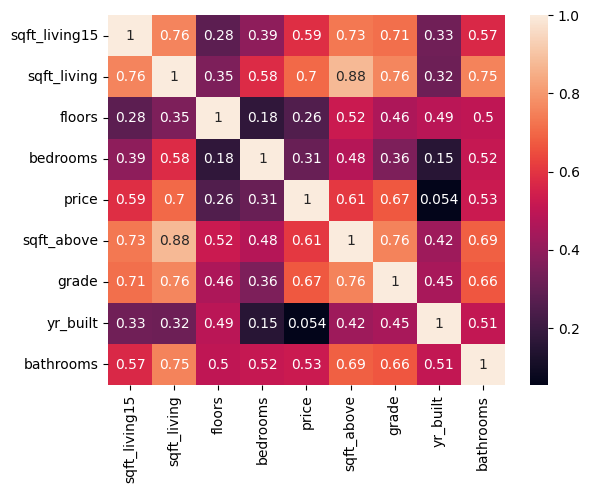

In [24]:
sns.heatmap(newtable.corr(),annot=True)

In [25]:
newtable.drop(['sqft_above','floors','grade'],axis=1,inplace=True)

In [26]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [27]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

<Figure size 2000x2000 with 0 Axes>

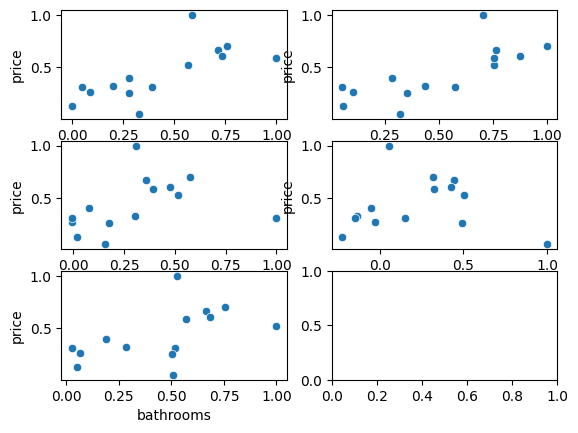

In [28]:
fig=plt.figure(figsize=(20,20))
fig,axis=plt.subplots(3,2)
val=newtable.columns
val=list(val)
val.remove('price')
count=0
for j in range(3):
    for k in range(2):
        sns.scatterplot(data=table,x=val[count],y='price',ax=axis[j][k])
        count+=1
        if count==5:
            break
    if count==5:
        break

In [29]:
y=newtable.price
x=newtable.drop('price',axis=1)

In [30]:
std=('std',StandardScaler(),['sqft_living15','sqft_living','bathrooms'])
mini=('min',MinMaxScaler(),['sqft_living15','sqft_living','bathrooms'])
col1=ColumnTransformer([std,mini],remainder='passthrough')
col=('column',col1)

In [31]:
pi1=Pipeline(steps=[col,('model1',RandomForestRegressor())])
pi2=Pipeline(steps=[col,('model2',BaggingRegressor())])
pi3=Pipeline(steps=[col,('model3',GradientBoostingRegressor())])
pi4=Pipeline(steps=[col,('model4',AdaBoostRegressor())])
pi5=Pipeline(steps=[col,('model5',LinearRegression())])
pi6=Pipeline(steps=[col,('model6',KNeighborsRegressor())])
pi7=Pipeline(steps=[col,('model7',SVR())])
pi8=Pipeline(steps=[col,('model8',LGBMRegressor())])
pi9=Pipeline(steps=[col,('model9',CatBoostRegressor())])
pi10=Pipeline(steps=[col,('model10',XGBRegressor())])
pi11=Pipeline(steps=[col,('model11',DecisionTreeRegressor())])

In [32]:
names=['RandomForestRegressor',
'BaggingRegressor',
'GradientBoostingRegressor',
'AdaBoostRegressor',
'LinearRegression',
'KNeighborsRegressor',
'SVR',
'LGBMRegressor',
'CatBoostRegressor',
'XGBRegressor',
'DecisionTreeRegressor',]
pipeline1=[pi1,pi2,pi3,pi4,pi5,pi6,pi7,pi8,pi9,pi10,pi11]

In [33]:
xtra,xtest,ytra,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [34]:
for i in pipeline1:
    i.fit(xtra,ytra)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 8
[LightGBM] [Info] Start training from score 539363.587970
Learning rate set to 0.064232
0:	learn: 353787.2013765	total: 51.7ms	remaining: 51.7s
1:	learn: 342913.1814142	total: 56ms	remaining: 27.9s
2:	learn: 333211.0937652	total: 60.2ms	remaining: 20s
3:	learn: 324045.8997206	total: 64.3ms	remaining: 16s
4:	learn: 315875.6687901	total: 68.3ms	remaining: 13.6s
5:	learn: 308166.1879614	total: 72.5ms	remaining: 12s
6:	learn: 301397.5169381	total: 76.5ms	remaining: 10.8s
7:	learn: 294900.7639664	total: 80.4ms	remaining: 9.97s
8:	learn: 289304.9075674	total: 84.4ms	remaining: 9.29s
9:	learn: 283879.5023313	total: 88.6ms	remaining: 8.77s
10:	learn: 278887.0898213	total: 92.6ms	remaining: 8.33s
11:	learn: 2747

In [35]:
c1=cross_val_score(pi1,xtest,ytest,cv=5,verbose=2,scoring='r2')
c2=cross_val_score(pi2,xtest,ytest,cv=5,verbose=2,scoring='r2')
c3=cross_val_score(pi3,xtest,ytest,cv=5,verbose=2,scoring='r2')
c4=cross_val_score(pi4,xtest,ytest,cv=5,verbose=2,scoring='r2')
c5=cross_val_score(pi5,xtest,ytest,cv=5,verbose=2,scoring='r2')
c6=cross_val_score(pi6,xtest,ytest,cv=5,verbose=2,scoring='r2')
c7=cross_val_score(pi7,xtest,ytest,cv=5,verbose=2,scoring='r2')
c8=cross_val_score(pi8,xtest,ytest,cv=5,verbose=2,scoring='r2')
c9=cross_val_score(pi9,xtest,ytest,cv=5,verbose=2,scoring='r2')
c10=cross_val_score(pi10,xtest,ytest,cv=5,verbose=2,scoring='r2')
c11=cross_val_score(pi11,xtest,ytest,cv=5,verbose=2,scoring='r2')

Streaming output truncated to the last 5000 lines.
19:	learn: 263777.6925186	total: 48.5ms	remaining: 2.37s
20:	learn: 261093.1790457	total: 52.5ms	remaining: 2.45s
21:	learn: 258491.8169817	total: 54.8ms	remaining: 2.44s
22:	learn: 255867.8993938	total: 57ms	remaining: 2.42s
23:	learn: 253430.1930034	total: 61.3ms	remaining: 2.49s
24:	learn: 251100.1051092	total: 64.8ms	remaining: 2.52s
25:	learn: 249114.3188535	total: 66.6ms	remaining: 2.49s
26:	learn: 246989.9245677	total: 69ms	remaining: 2.48s
27:	learn: 245008.2980996	total: 70.9ms	remaining: 2.46s
28:	learn: 242919.1866866	total: 73.1ms	remaining: 2.45s
29:	learn: 241215.6276476	total: 75.3ms	remaining: 2.43s
30:	learn: 239618.3853271	total: 77.5ms	remaining: 2.42s
31:	learn: 238130.3314918	total: 79.9ms	remaining: 2.42s
32:	learn: 236542.7588062	total: 82.1ms	remaining: 2.41s
33:	learn: 235246.8912716	total: 84.5ms	remaining: 2.4s
34:	learn: 233545.0614689	total: 86.8ms	remaining: 2.39s
35:	learn: 232030.4263379	total: 89.2ms	re

In [36]:
list3=[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11]
print('Cross_Val_Scores')
for i in range(len(pipeline1)):
  print(names[i],":",list3[i],'Mean :',"{:.2f}".format(list3[i].mean()))

Cross_Val_Scores
RandomForestRegressor : [0.60973056 0.62280235 0.65514055 0.5755199  0.48137429] Mean : 0.59
BaggingRegressor : [0.58061878 0.5924588  0.61443529 0.57504843 0.4723675 ] Mean : 0.57
GradientBoostingRegressor : [0.62990462 0.61769546 0.68940358 0.61945505 0.44980401] Mean : 0.60
AdaBoostRegressor : [0.44575904 0.29764252 0.29733185 0.33421454 0.33173357] Mean : 0.34
LinearRegression : [0.59133654 0.55926477 0.61892804 0.54773881 0.51564519] Mean : 0.57
KNeighborsRegressor : [0.51264892 0.51851724 0.5465241  0.53544056 0.46494444] Mean : 0.52
SVR : [-0.08387401 -0.05250308 -0.08307882 -0.0422268  -0.05435386] Mean : -0.06
LGBMRegressor : [0.61025851 0.59965717 0.65257691 0.57364724 0.55047516] Mean : 0.60
CatBoostRegressor : [0.63556526 0.63433854 0.65339551 0.64205349 0.53486996] Mean : 0.62
XGBRegressor : [0.59710115 0.58257642 0.59935461 0.58257898 0.50771125] Mean : 0.57
DecisionTreeRegressor : [0.19302898 0.15764667 0.24457257 0.32030765 0.14658522] Mean : 0.21


In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
model1=RandomizedSearchCV(pi1,{
    'model1__n_estimators': [50, 100, 200],
    'model1__max_depth': [None, 10, 20, 30],
    'model1__min_samples_split': [2, 5, 10],
    'model1__min_samples_leaf': [1, 2, 4],
    'model1__max_features': ['auto', 'sqrt', 'log2', None]
},scoring='r2',cv=5
)
model2=RandomizedSearchCV(pi2,{
    'model2__n_estimators': [10, 50, 100],
    'model2__max_samples': [0.5, 0.7, 1.0],
    'model2__max_features': [0.5, 0.7, 1.0]
}
,scoring='r2',cv=5
)
model3=RandomizedSearchCV(pi3,{
    'model3__n_estimators': [50, 100, 200],
    'model3__learning_rate': [0.01, 0.1, 0.2],
    'model3__max_depth': [3, 5, 7],
    'model3__subsample': [0.8, 1.0],
    'model3__min_samples_split': [2, 5, 10],
    'model3__min_samples_leaf': [1, 2, 4]
}

,scoring='r2',cv=5
)
model4=RandomizedSearchCV(pi5,
    {
    'model5__fit_intercept': [True, False],
    'model5__positive': [True, False],
    'model5__copy_X': [True, False],
    'model5__n_jobs': [None, 1, 2, 4]  # Adjust the number of jobs based on your system capabilities
}

,scoring='r2',cv=5
)
model5=RandomizedSearchCV(pi6,{
    'column__std__with_mean': [True, False],
    'column__std__with_std': [True, False],
    'column__min__feature_range': [(0, 1), (0, 0.5)],
    'model6__n_neighbors': [3, 5, 7, 10],
    'model6__weights': ['uniform', 'distance'],
    'model6__p': [1, 2]
}

,scoring='r2',cv=5
)

model6=RandomizedSearchCV(pi8,{
    'model8__num_leaves': [31, 50, 100],
    'model8__learning_rate': [0.01, 0.1, 0.2],
    'model8__n_estimators': [50, 100, 200],
    'model8__subsample': [0.8, 1.0],
    'model8__colsample_bytree': [0.8, 1.0]
}
,scoring='r2',cv=5
)
model7=RandomizedSearchCV(pi9,{
    'model9__iterations': [50, 100, 200],
    'model9__learning_rate': [0.01, 0.1, 0.2],
    'model9__depth': [3, 5, 7],
    'model9__subsample': [0.8, 1.0]
}

,scoring='r2',cv=5
)
model8=RandomizedSearchCV(pi10,{
    'model10__n_estimators': [50, 100, 200],
    'model10__learning_rate': [0.01, 0.1, 0.2],
    'model10__max_depth': [3, 5, 7],
    'model10__subsample': [0.8, 1.0],
    'model10__colsample_bytree': [0.8, 1.0],
    'model10__gamma': [0, 1, 5],
    'model10__reg_alpha': [0, 0.1, 0.5],
    'model10__reg_lambda': [1, 2, 5],
}

,scoring='r2',cv=5
)

In [39]:
models=[model1,model2,model3,model4,model5,model6,model7,model8]

In [41]:
model1.fit(xtra,ytra)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('column',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('std',
                                                                               StandardScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms']),
                                                                              ('min',
                                                                               MinMaxScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms'])])),
                                             ('model1',
                                              RandomForestRegressor())]),
                   param_distributions={'model1__max_depth': [None, 10, 20, 30],
                                        'model1__max_features': ['auto', 'sqrt',
                                                                 'log2', None],
                                        'model1__min_samples_leaf': [1, 2, 4],
                                        'model1__min_samples_split': [2, 5, 10],
                                        'model1__n_estimators': [50, 100, 200]},
                   scoring='r2')

In [42]:
model2.fit(xtra,ytra)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('column',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('std',
                                                                               StandardScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms']),
                                                                              ('min',
                                                                               MinMaxScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms'])])),
                                             ('model2', BaggingRegressor())]),
                   param_distributions={'model2__max_features': [0.5, 0.7, 1.0],
                                        'model2__max_samples': [0.5, 0.7, 1.0],
                                        'model2__n_estimators': [10, 50, 100]},
                   scoring='r2')

In [43]:
model3.fit(xtra,ytra)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('column',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('std',
                                                                               StandardScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms']),
                                                                              ('min',
                                                                               MinMaxScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms'])])),
                                             ('model3',
                                              GradientBoostingRegressor())]),
                   param_distributions={'model3__learning_rate': [0.01, 0.1,
                                                                  0.2],
                                        'model3__max_depth': [3, 5, 7],
                                        'model3__min_samples_leaf': [1, 2, 4],
                                        'model3__min_samples_split': [2, 5, 10],
                                        'model3__n_estimators': [50, 100, 200],
                                        'model3__subsample': [0.8, 1.0]},
                   scoring='r2')

In [44]:
model4.fit(xtra,ytra)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('column',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('std',
                                                                               StandardScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms']),
                                                                              ('min',
                                                                               MinMaxScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms'])])),
                                             ('model5', LinearRegression())]),
                   param_distributions={'model5__copy_X': [True, False],
                                        'model5__fit_intercept': [True, False],
                                        'model5__n_jobs': [None, 1, 2, 4],
                                        'model5__positive': [True, False]},
                   scoring='r2')

In [45]:
model5.fit(xtra,ytra)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('column',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('std',
                                                                               StandardScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms']),
                                                                              ('min',
                                                                               MinMaxScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms'])])),
                                             ('model6',
                                              KNeighborsRegressor())]),
                   param_distributions={'column__min__feature_range': [(0, 1),
                                                                       (0,
                                                                        0.5)],
                                        'column__std__with_mean': [True, False],
                                        'column__std__with_std': [True, False],
                                        'model6__n_neighbors': [3, 5, 7, 10],
                                        'model6__p': [1, 2],
                                        'model6__weights': ['uniform',
                                                            'distance']},
                   scoring='r2')

In [46]:
model6.fit(xtra,ytra)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 13832, number of used features: 8
[LightGBM] [Info] Start training from score 541212.400737
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1200
[LightGBM] [Info] Number of data points in the train set: 13832, number of used features: 8
[LightGBM] [Info] Start training from score 536343.605191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 13832, number of used features: 8
[LightGBM] [Info] St

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('column',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('std',
                                                                               StandardScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms']),
                                                                              ('min',
                                                                               MinMaxScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms'])])),
                                             ('model8', LGBMRegressor())]),
                   param_distributions={'model8__colsample_bytree': [0.8, 1.0],
                                        'model8__learning_rate': [0.01, 0.1,
                                                                  0.2],
                                        'model8__n_estimators': [50, 100, 200],
                                        'model8__num_leaves': [31, 50, 100],
                                        'model8__subsample': [0.8, 1.0]},
                   scoring='r2')

In [47]:
model7.fit(xtra,ytra)

Streaming output truncated to the last 5000 lines.
0:	learn: 363889.7102011	total: 4.92ms	remaining: 241ms
1:	learn: 362098.0132961	total: 10.3ms	remaining: 246ms
2:	learn: 360318.3765363	total: 15ms	remaining: 235ms
3:	learn: 358553.3934149	total: 20ms	remaining: 230ms
4:	learn: 356823.3179020	total: 27.1ms	remaining: 244ms
5:	learn: 355103.4644426	total: 32.1ms	remaining: 236ms
6:	learn: 353421.9259170	total: 37ms	remaining: 227ms
7:	learn: 351761.2525753	total: 41.8ms	remaining: 220ms
8:	learn: 350088.9760026	total: 46.7ms	remaining: 213ms
9:	learn: 348444.9040537	total: 51.4ms	remaining: 206ms
10:	learn: 346875.7619751	total: 56.4ms	remaining: 200ms
11:	learn: 345268.2948416	total: 61.5ms	remaining: 195ms
12:	learn: 343736.2048027	total: 66.2ms	remaining: 188ms
13:	learn: 342200.8004654	total: 71ms	remaining: 183ms
14:	learn: 340789.4913337	total: 75.8ms	remaining: 177ms
15:	learn: 339253.7576284	total: 82ms	remaining: 174ms
16:	learn: 337762.1321998	total: 87.4ms	remaining: 170ms


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('column',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('std',
                                                                               StandardScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms']),
                                                                              ('min',
                                                                               MinMaxScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms'])])),
                                             ('model9',
                                              <catboost.core.CatBoostRegressor object at 0x781709945ba0>)]),
                   param_distributions={'model9__depth': [3, 5, 7],
                                        'model9__iterations': [50, 100, 200],
                                        'model9__learning_rate': [0.01, 0.1,
                                                                  0.2],
                                        'model9__subsample': [0.8, 1.0]},
                   scoring='r2')

In [48]:
model8.fit(xtra,ytra)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('column',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('std',
                                                                               StandardScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms']),
                                                                              ('min',
                                                                               MinMaxScaler(),
                                                                               ['sqft_living15',
                                                                                'sqft_living',
                                                                                'bathrooms'])])),
                                             ('model10',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           cols...
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           random_state=None, ...))]),
                   param_distributions={'model10__colsample_bytree': [0.8, 1.0],
                                        'model10__gamma': [0, 1, 5],
                                        'model10__learning_rate': [0.01, 0.1,
                                                                   0.2],
                                        'model10__max_depth': [3, 5, 7],
                                        'model10__n_estimators': [50, 100, 200],
                                        'model10__reg_alpha': [0, 0.1, 0.5],
                                        'model10__reg_lambda': [1, 2, 5],
                                        'model10__subsample': [0.8, 1.0]},
                   scoring='r2')

In [49]:
c1=cross_val_score(model1,xtest,ytest,cv=5,verbose=2,scoring='r2')
c2=cross_val_score(model2,xtest,ytest,cv=5,verbose=2,scoring='r2')
c3=cross_val_score(model3,xtest,ytest,cv=5,verbose=2,scoring='r2')
c4=cross_val_score(model4,xtest,ytest,cv=5,verbose=2,scoring='r2')
c5=cross_val_score(model5,xtest,ytest,cv=5,verbose=2,scoring='r2')
c6=cross_val_score(model6,xtest,ytest,cv=5,verbose=2,scoring='r2')
c7=cross_val_score(model7,xtest,ytest,cv=5,verbose=2,scoring='r2')

Streaming output truncated to the last 5000 lines.
51:	learn: 192404.9278500	total: 168ms	remaining: 477ms
52:	learn: 191718.1080618	total: 171ms	remaining: 473ms
53:	learn: 190866.2532258	total: 175ms	remaining: 473ms
54:	learn: 190474.6293861	total: 179ms	remaining: 471ms
55:	learn: 190285.1855628	total: 180ms	remaining: 463ms
56:	learn: 190041.1378243	total: 184ms	remaining: 462ms
57:	learn: 189591.2504831	total: 187ms	remaining: 458ms
58:	learn: 189324.5020579	total: 190ms	remaining: 453ms
59:	learn: 189121.9249188	total: 193ms	remaining: 450ms
60:	learn: 188599.2599201	total: 195ms	remaining: 445ms
61:	learn: 188317.5996062	total: 198ms	remaining: 441ms
62:	learn: 187670.8710380	total: 201ms	remaining: 437ms
63:	learn: 187253.7345728	total: 204ms	remaining: 433ms
64:	learn: 186749.2630825	total: 207ms	remaining: 429ms
65:	learn: 186219.5952944	total: 210ms	remaining: 426ms
66:	learn: 185339.8170926	total: 212ms	remaining: 422ms
67:	learn: 185047.6286266	total: 216ms	remaining: 418

In [50]:
c8=cross_val_score(model8,xtest,ytest,cv=5,verbose=2,scoring='r2')


[CV] END .................................................... total time=  15.3s
[CV] END .................................................... total time=   6.8s
[CV] END .................................................... total time=  10.2s
[CV] END .................................................... total time=  13.4s
[CV] END .................................................... total time=   6.7s


In [51]:
list3=[c1,c2,c3,c4,c5,c6,c7,c8]
names=['Random Forest', 'Bagging', 'Gradient Boosting', 'Linear Regression', 'KNeighbors', 'LightGBM','CatBoost','XGBRegressor']
print('Cross_Val_Scores After hypertuning')
for i in range(8):
  print(names[i],":",list3[i],'Mean :',"{:.2f}".format(list3[i].mean()))

Cross_Val_Scores After hypertuning
Random Forest : [0.64241279 0.62135041 0.65907059 0.59852888 0.53505188] Mean : 0.61
Bagging : [0.63029787 0.62349644 0.6754445  0.58692487 0.47537784] Mean : 0.60
Gradient Boosting : [0.62314962 0.60665742 0.67636989 0.62370047 0.43295905] Mean : 0.59
Linear Regression : [0.59133654 0.55926477 0.61892804 0.54773881 0.51564519] Mean : 0.57
KNeighbors : [0.54030818 0.57035111 0.5300926  0.51144473 0.49828834] Mean : 0.53
LightGBM : [0.59923927 0.60207764 0.64564246 0.57118451 0.57923329] Mean : 0.60
CatBoost : [0.65114464 0.63739987 0.67191015 0.62156787 0.53204062] Mean : 0.62
XGBRegressor : [0.63961896 0.58393638 0.67212315 0.64153518 0.55436161] Mean : 0.62
